In [1]:
# spacy needs to run in another conda environment (probably issue of the use of CPU with conda & spacy for mac)
# in terminal conda activate nlp (env name)
import pandas as pd
import numpy as np
import random
random.seed("ic2s2colgne")
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from datetime import datetime
import spacy
from collections import Counter

### Preliminary analysis for the final dataset

#### Prepare the dataset

In [2]:
df = pd.read_csv('data_final.csv')
df.drop(labels = ['Unnamed: 0', 'keep'], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)

In [3]:
len(df)

59541

In [4]:
df.head()

,index,filename,text_clean,date,year,month,outlet,country,south,text_original
0,0,'Act now'_ APRA issues climate change advice.rtf,"November 27, 2021 Saturday Australian3 Edition...",2021-11-01,2021,11,The Australian,Australia,0,"\nNovember 27, 2021 Saturday\nAustralian3 Edit..."
1,1,'Australia must keep 95pc coal in ground'.rtf,"September 9, 2021 Thursday Australian Edition ...",2021-09-01,2021,9,The Australian,Australia,0,"\nSeptember 9, 2021 Thursday\nAustralian Editi..."
2,2,"'Ban new coalmines, gas and oil fields to hit ...","May 19, 2021 Wednesday Australian Edition Copy...",2021-05-01,2021,5,The Australian,Australia,0,"\nMay 19, 2021 Wednesday\nAustralian Edition\n..."
3,7,'Climate change_ It's really not for us'.rtf,"July 11, 2019 Thursday Australian Edition Copy...",2019-07-01,2019,7,The Australian,Australia,0,"\nJuly 11, 2019 Thursday\nAustralian Edition\n..."
4,8,'Climate changes investment' - GLOBAL FOOD FOR...,"March 21, 2019 Thursday Australian Edition Cop...",2019-03-01,2019,3,The Australian,Australia,0,"\nMarch 21, 2019 Thursday\nAustralian Edition\..."


In [5]:
names = ["climate change", "global warming", "greenhouse effect", "climate warming",
         "climatic change", "greenhouse warming", "warming climate", "changing climate", "warmer climate",
         "planetary warming", "climatic disruption", "climate catastrophe", "climate chaos", "climate crisis", 
         "climate disaster", "climate emergency", "global heating", "climate breakdown", "climate threat"]

In [6]:
def words_present_anywhere(text, query):
    import re
    text = str(text).lower()
    newtext = re.sub(r'[^\w\s]', ' ', text)
    newtext = " ".join(newtext.split())
    query = str(query).lower()
    count = newtext.count(query)
    return count

In [7]:
for name in names:
    df[name] = df['text_clean'].apply(words_present_anywhere, args=(name,))

In [8]:
df["label_sum"] = df.iloc[:,10:29].sum(axis=1)
df["neutral"] = df.iloc[:,10:20].sum(axis=1)
df["urgent"] = df.iloc[:,20:29].sum(axis=1)
#df.drop(df[df['label_sum'] < 2].index, inplace = True)

In [9]:
df = df.reset_index().drop(['level_0'], axis=1)

In [10]:
len(df)

59541

In [11]:
df.tail()

,index,filename,text_clean,date,year,month,outlet,country,south,text_original,climate change,global warming,greenhouse effect,climate warming,climatic change,greenhouse warming,warming climate,changing climate,warmer climate,planetary warming,climatic disruption,climate catastrophe,climate chaos,climate crisis,climate disaster,climate emergency,global heating,climate breakdown,climate threat,label_sum,neutral,urgent
59536,124485,newsarticle/The Press/Neutral & Urgent 2006-20...,"In a few words The Press (Christchurch, New Ze...",2019-08-03,2019,8,The Press,New Zealand,0,"\n\n\nIn a few words\nThe Press (Christchurch,...",1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,1,2
59537,124486,newsarticle/The Press/Neutral & Urgent 2006-20...,"No Tarras airport The Press (Christchurch, New...",2020-12-10,2020,12,The Press,New Zealand,0,\n\n\nNo Tarras airport\nThe Press (Christchur...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,3
59538,124514,newsarticle/The Press/Neutral & Urgent 2006-20...,"Stadium emissions The Press (Christchurch, New...",2019-12-12,2019,12,The Press,New Zealand,0,\n\n\nStadium emissions\nThe Press (Christchur...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1
59539,124519,newsarticle/The Press/Neutral & Urgent 2006-20...,"Priorities clear The Press (Christchurch, New ...",2019-06-29,2019,6,The Press,New Zealand,0,\n\n\nPriorities clear\nThe Press (Christchurc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
59540,124529,newsarticle/The Press/Neutral & Urgent 2006-20...,"No choice but to care The Press (Christchurch,...",2020-01-21,2020,1,The Press,New Zealand,0,\n\n\nNo choice but to care\nThe Press (Christ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,2


In [12]:
for name in names:
    df[name+"_binary"] = df.apply(lambda x: 0 if x[name] == 0 else 1, axis=1) 

df["neutral_binary"] = df.apply(lambda x: 0 if x["neutral"] == 0 else 1, axis=1) 
df["urgent_binary"] = df.apply(lambda x: 0 if x["urgent"] == 0 else 1, axis=1) 

In [13]:
df.tail()

,index,filename,text_clean,date,year,month,outlet,country,south,text_original,climate change,global warming,greenhouse effect,climate warming,climatic change,greenhouse warming,warming climate,changing climate,warmer climate,planetary warming,climatic disruption,climate catastrophe,climate chaos,climate crisis,climate disaster,climate emergency,global heating,climate breakdown,climate threat,label_sum,neutral,urgent,climate change_binary,global warming_binary,greenhouse effect_binary,climate warming_binary,climatic change_binary,greenhouse warming_binary,warming climate_binary,changing climate_binary,warmer climate_binary,planetary warming_binary,climatic disruption_binary,climate catastrophe_binary,climate chaos_binary,climate crisis_binary,climate disaster_binary,climate emergency_binary,global heating_binary,climate breakdown_binary,climate threat_binary,neutral_binary,urgent_binary
59536,124485,newsarticle/The Press/Neutral & Urgent 2006-20...,"In a few words The Press (Christchurch, New Ze...",2019-08-03,2019,8,The Press,New Zealand,0,"\n\n\nIn a few words\nThe Press (Christchurch,...",1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
59537,124486,newsarticle/The Press/Neutral & Urgent 2006-20...,"No Tarras airport The Press (Christchurch, New...",2020-12-10,2020,12,The Press,New Zealand,0,\n\n\nNo Tarras airport\nThe Press (Christchur...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
59538,124514,newsarticle/The Press/Neutral & Urgent 2006-20...,"Stadium emissions The Press (Christchurch, New...",2019-12-12,2019,12,The Press,New Zealand,0,\n\n\nStadium emissions\nThe Press (Christchur...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
59539,124519,newsarticle/The Press/Neutral & Urgent 2006-20...,"Priorities clear The Press (Christchurch, New ...",2019-06-29,2019,6,The Press,New Zealand,0,\n\n\nPriorities clear\nThe Press (Christchurc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
59540,124529,newsarticle/The Press/Neutral & Urgent 2006-20...,"No choice but to care The Press (Christchurch,...",2020-01-21,2020,1,The Press,New Zealand,0,\n\n\nNo choice but to care\nThe Press (Christ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [14]:
df["outlet"].value_counts(normalize=True)

outlet
Guardian                     0.166390
The Australian               0.118238
The New York Times           0.097345
The Sydney Morning Herald    0.088762
Toronto Star                 0.080247
GlobeMail                    0.072891
The Washington Post          0.064174
The Times                    0.062747
Hindu                        0.059388
Times of India               0.049663
The New Zealand Herald       0.047917
The Press                    0.027578
The Nation                   0.022707
Bangkok Post                 0.019449
The Star                     0.017954
Sunday Times                 0.004551
Name: proportion, dtype: float64

In [15]:
df["outlet"].value_counts()

outlet
Guardian                     9907
The Australian               7040
The New York Times           5796
The Sydney Morning Herald    5285
Toronto Star                 4778
GlobeMail                    4340
The Washington Post          3821
The Times                    3736
Hindu                        3536
Times of India               2957
The New Zealand Herald       2853
The Press                    1642
The Nation                   1352
Bangkok Post                 1158
The Star                     1069
Sunday Times                  271
Name: count, dtype: int64

In [16]:
df["neutral_binary"].value_counts(normalize=True)

neutral_binary
1    0.988462
0    0.011538
Name: proportion, dtype: float64

In [17]:
df["urgent_binary"].value_counts(normalize=True)

urgent_binary
0    0.903999
1    0.096001
Name: proportion, dtype: float64

In [18]:
df.to_csv("data_final.csv")

#### RQ1: How often are neutral and activist compounds used?

In [20]:
df2=df[["climate change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
         "climatic change_binary", "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
        "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
         "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
        "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary"]]

In [21]:
c = list()
c = df2.columns.tolist()
for i in range(len(c)): #Loop every column
        c[i] = c[i].replace("_binary",'')

df2.columns = c

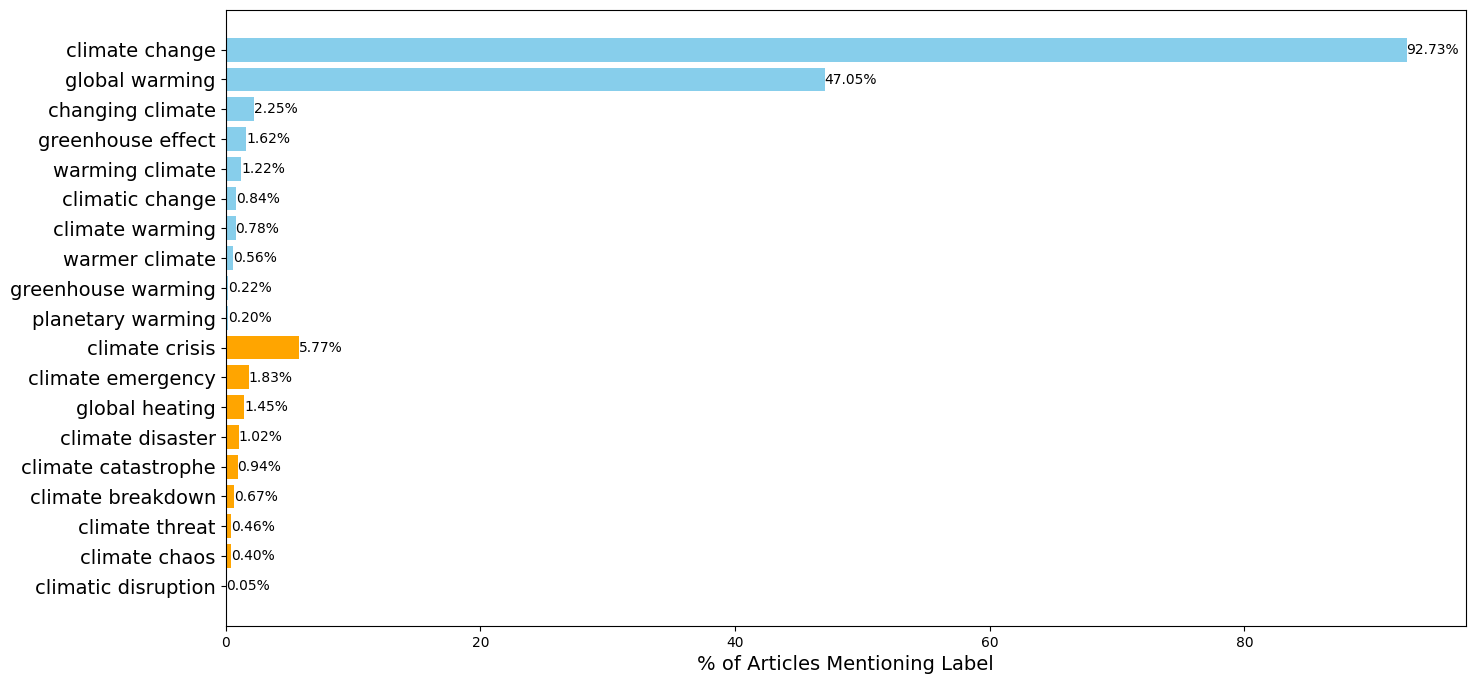

In [22]:
percentages = (df2.sum() / len(df2)) * 100
percentages1 = percentages[["climate change", "global warming", "greenhouse effect", "climate warming",
         "climatic change", "greenhouse warming", "warming climate", "changing climate",
                           "warmer climate", "planetary warming"]].sort_values(ascending=True)
percentages2 = percentages[["climatic disruption",
         "climate catastrophe", "climate chaos", "climate crisis", "climate disaster", 
        "climate emergency", "global heating", "climate breakdown", "climate threat"]].sort_values(ascending=True)
percentages = pd.concat([percentages2,percentages1])


#colors = ['skyblue' if i < 7 else 'orange' for i in range(len(percentages))]
colors=['skyblue' if col in ["climate change", "global warming", "greenhouse effect", "climate warming",
         "climatic change", "greenhouse warming", "warming climate","changing climate",
                        "warmer climate", "planetary warming"] else 'orange' for col in percentages.index]

plt.figure(figsize=(16, 8))
bars = plt.barh(percentages.index, percentages.values, color=colors)

for bar, percentage in zip(bars, percentages.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center', clip_on=True)


#plt.figure(figsize=(10, 8))
#percentages.plot(kind='barh')
plt.xlabel('% of Articles Mentioning Label', fontsize = 14, y=-0.25)
plt.yticks(fontsize = 14)
#plt.xticks(rotation=45)
plt.show()

In [23]:
df3 = df2[["climate change", "global warming", "changing climate", "climate crisis",
        "climate emergency", "global heating"]]

In [24]:
df3["other neutral"] = df2[["greenhouse effect","climate warming","climatic change", 
                            "greenhouse warming", "warming climate", "warmer climate", 
                           "planetary warming"]].sum(axis=1)
df3["other urgent"] = df2[["climatic disruption","climate catastrophe", 
                                   "climate chaos","climate disaster","climate breakdown", 
                                   "climate threat"]].sum(axis=1)

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_34650/3960796066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["other neutral"] = df2[["greenhouse effect","climate warming","climatic change",
/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_34650/3960796066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["other urgent"] = df2[["climatic disruption","climate catastrophe",


In [25]:
col = df3.pop('other neutral')
df3.insert(3, col.name, col)

In [26]:
df3.head()

,climate change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [27]:
table = df3.T.dot(df3)

In [28]:
table

,climate change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
climate change,55215,24548,1306,2704,3086,874,728,1919
global warming,24548,28016,629,2278,1121,275,215,946
changing climate,1306,629,1341,196,95,30,19,65
other neutral,2704,2278,196,3681,145,34,27,125
climate crisis,3086,1121,95,145,3438,437,482,632
climate emergency,874,275,30,34,437,1090,154,225
global heating,728,215,19,27,482,154,865,277
other urgent,1919,946,65,125,632,225,277,2455


In [29]:
print(table.corr())

                   climate change  global warming  changing climate  \
climate change           1.000000        0.870745          0.629079   
global warming           0.870745        1.000000          0.521191   
changing climate         0.629079        0.521191          1.000000   
other neutral            0.552671        0.587306          0.293988   
climate crisis           0.577207        0.399546          0.178068   
climate emergency        0.425121        0.236471          0.011498   
global heating           0.396286        0.188521         -0.056844   
other urgent             0.503831        0.390017          0.108623   

                   other neutral  climate crisis  climate emergency  \
climate change          0.552671        0.577207           0.425121   
global warming          0.587306        0.399546           0.236471   
changing climate        0.293988        0.178068           0.011498   
other neutral           1.000000        0.087809          -0.080381   
clima

Text(0.5, 1.0, 'Correlations between labels used in articles')

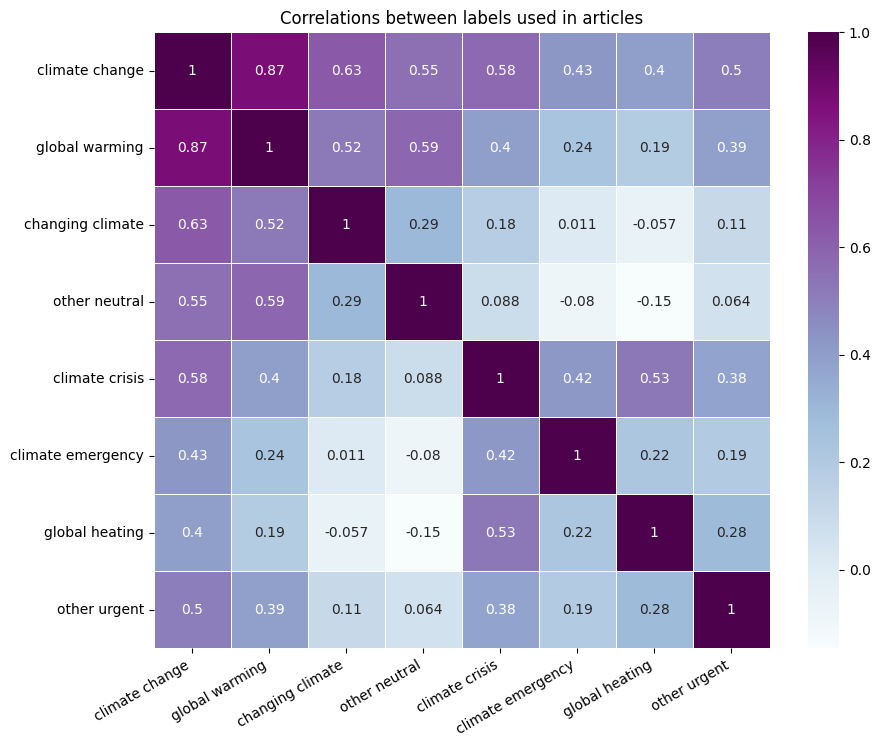

In [30]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(table.corr(), cmap="BuPu", square=True, annot=True, linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
ax.set_title("Correlations between labels used in articles")

#### RQ2

In [34]:
df["date"]= pd.to_datetime(df["date"])
df['date_new'] = df['date'].apply(lambda dt: dt.replace(day = 1))

In [35]:
def plotyear(ax,name,colour):   
    labeltime = df[['date_new', name+"_binary"]].groupby(['date_new']).sum()
    labeltime["number_article"]=df[['date_new', 'filename']].groupby(['date_new']).count()
    labeltime["percentage_"+name] = labeltime[name+'_binary']/labeltime["number_article"]*100
    labeltime.reset_index(inplace=True)

    ax.fill_between(labeltime['date_new'], labeltime['percentage_'+name], color=colour, alpha=0.3)
    ax.plot(labeltime['date_new'], labeltime['percentage_'+name], color=colour, label=name)
    years = [1995,1999,2003,2007,2011,2015,2019,2023]
    years=[str(i) for i in years]
    years=pd.to_datetime(years,format="%Y").strftime('%Y')
    p = [0,25,50,75,100]
    ax.set_xticks(years,years,fontsize=12)
    ax.set_yticks(p,p,fontsize=12)
    ax.set_ylabel('% of Articles Mentioning Label',fontsize=14)
    ax.set_title(name,fontsize=16)

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_34650/1104214177.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


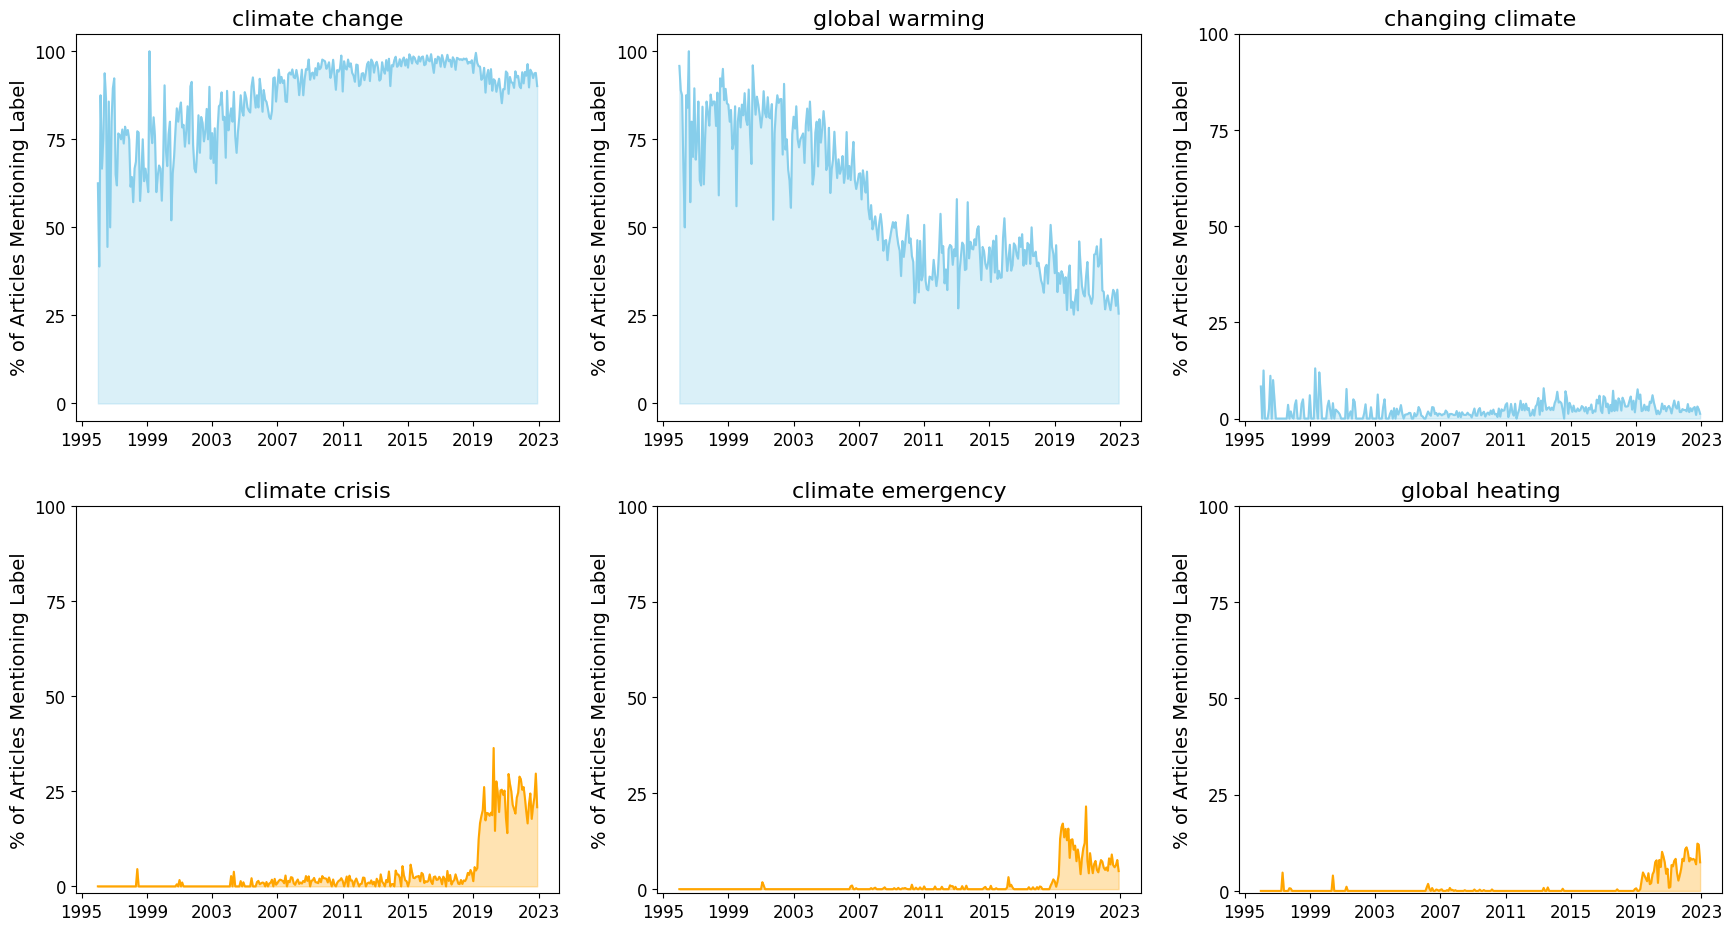

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=3, layout='constrained', figsize=(18,10))
fig.tight_layout(pad=4.0)
#plt.ylabel('% of Articles Mentioning Label')
plotyear(axs[0, 0],"climate change","skyblue")
plotyear(axs[0, 1],"global warming","skyblue")
plotyear(axs[0, 2],"changing climate","skyblue")
plotyear(axs[1, 0],"climate crisis","orange")
plotyear(axs[1, 1],"climate emergency","orange")
plotyear(axs[1, 2],"global heating","orange")

In [42]:
crisistime = df[['year', "climate crisis_binary"]].groupby(['year']).sum()
crisistime["number_article"]=df[['year', 'filename']].groupby(['year']).count()
crisistime["percentage_climate crisis"]=crisistime['climate crisis_binary']/crisistime["number_article"]*100

In [43]:
crisistime

,climate crisis_binary,number_article,percentage_climate crisis
year,,,
1996,0,233,0.000000
1997,0,904,0.000000
1998,1,446,0.224215
1999,0,312,0.000000
2000,1,636,0.157233
2001,2,765,0.261438
2002,0,833,0.000000
2003,0,486,0.000000
2004,6,797,0.752823


#### RQ3.1

complex imagesgrid: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-nested-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

In [37]:
def plotcountry(gss,co):

    country = df[["climate change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "climatic change_binary", "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
             "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == co]

    c = list()
    c = country.columns.tolist()
    for i in range(len(c)): #Loop every column
            c[i] = c[i].replace("_binary",'')

    country.columns = c

    country["other neutral"] = country[["greenhouse effect","climate warming","climatic change", 
                            "greenhouse warming", "warming climate", "warmer climate", 
                           "planetary warming"]].sum(axis=1)
    country["other neutral"] = country.apply(lambda x: 0 if x["other neutral"] == 0 else 1, axis=1)

    country["other urgent"] = country[["climatic disruption","climate catastrophe", 
                                       "climate chaos","climate disaster","climate breakdown", 
                                       "climate threat"]].sum(axis=1)
    country["other urgent"] = country.apply(lambda x: 0 if x["other urgent"] == 0 else 1, axis=1)

    country.reset_index(inplace=True)
    country.drop(labels = ['index'], axis = 1, inplace = True)

    percentage = (country.sum() / len(country)) * 100

    #fig = plt.figure(layout='constrained')
    #plt.yticks([])
    gs = GridSpecFromSubplotSpec(2, 2, subplot_spec=gss)

    big_subplot = fig.add_subplot(gs[1, :])
    big_subplot.bar(percentage[["neutral","urgent"]].index, percentage[["neutral","urgent"]].values,
           color=["skyblue","orange"])
    plt.title(co, weight='bold', y=-0.25)

    cmap = plt.get_cmap('tab20c')
    top_left_subplot = fig.add_subplot(gs[0, 0])
    top_left_subplot.bar(percentage[["climate change","global warming", "changing climate", "other neutral"]].index, 
            percentage[["climate change","global warming", "changing climate", "other neutral"]].values,
            label=percentage[["climate change","global warming", "changing climate", "other neutral"]].index,
            color=[cmap(i) for i in range(4)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])

    top_right_subplot = fig.add_subplot(gs[0, 1])
    top_right_subplot.bar(percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index, 
            percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].values,
            label = percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index,
            color=[cmap(i) for i in range(4,8)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])
    plt.yticks([])


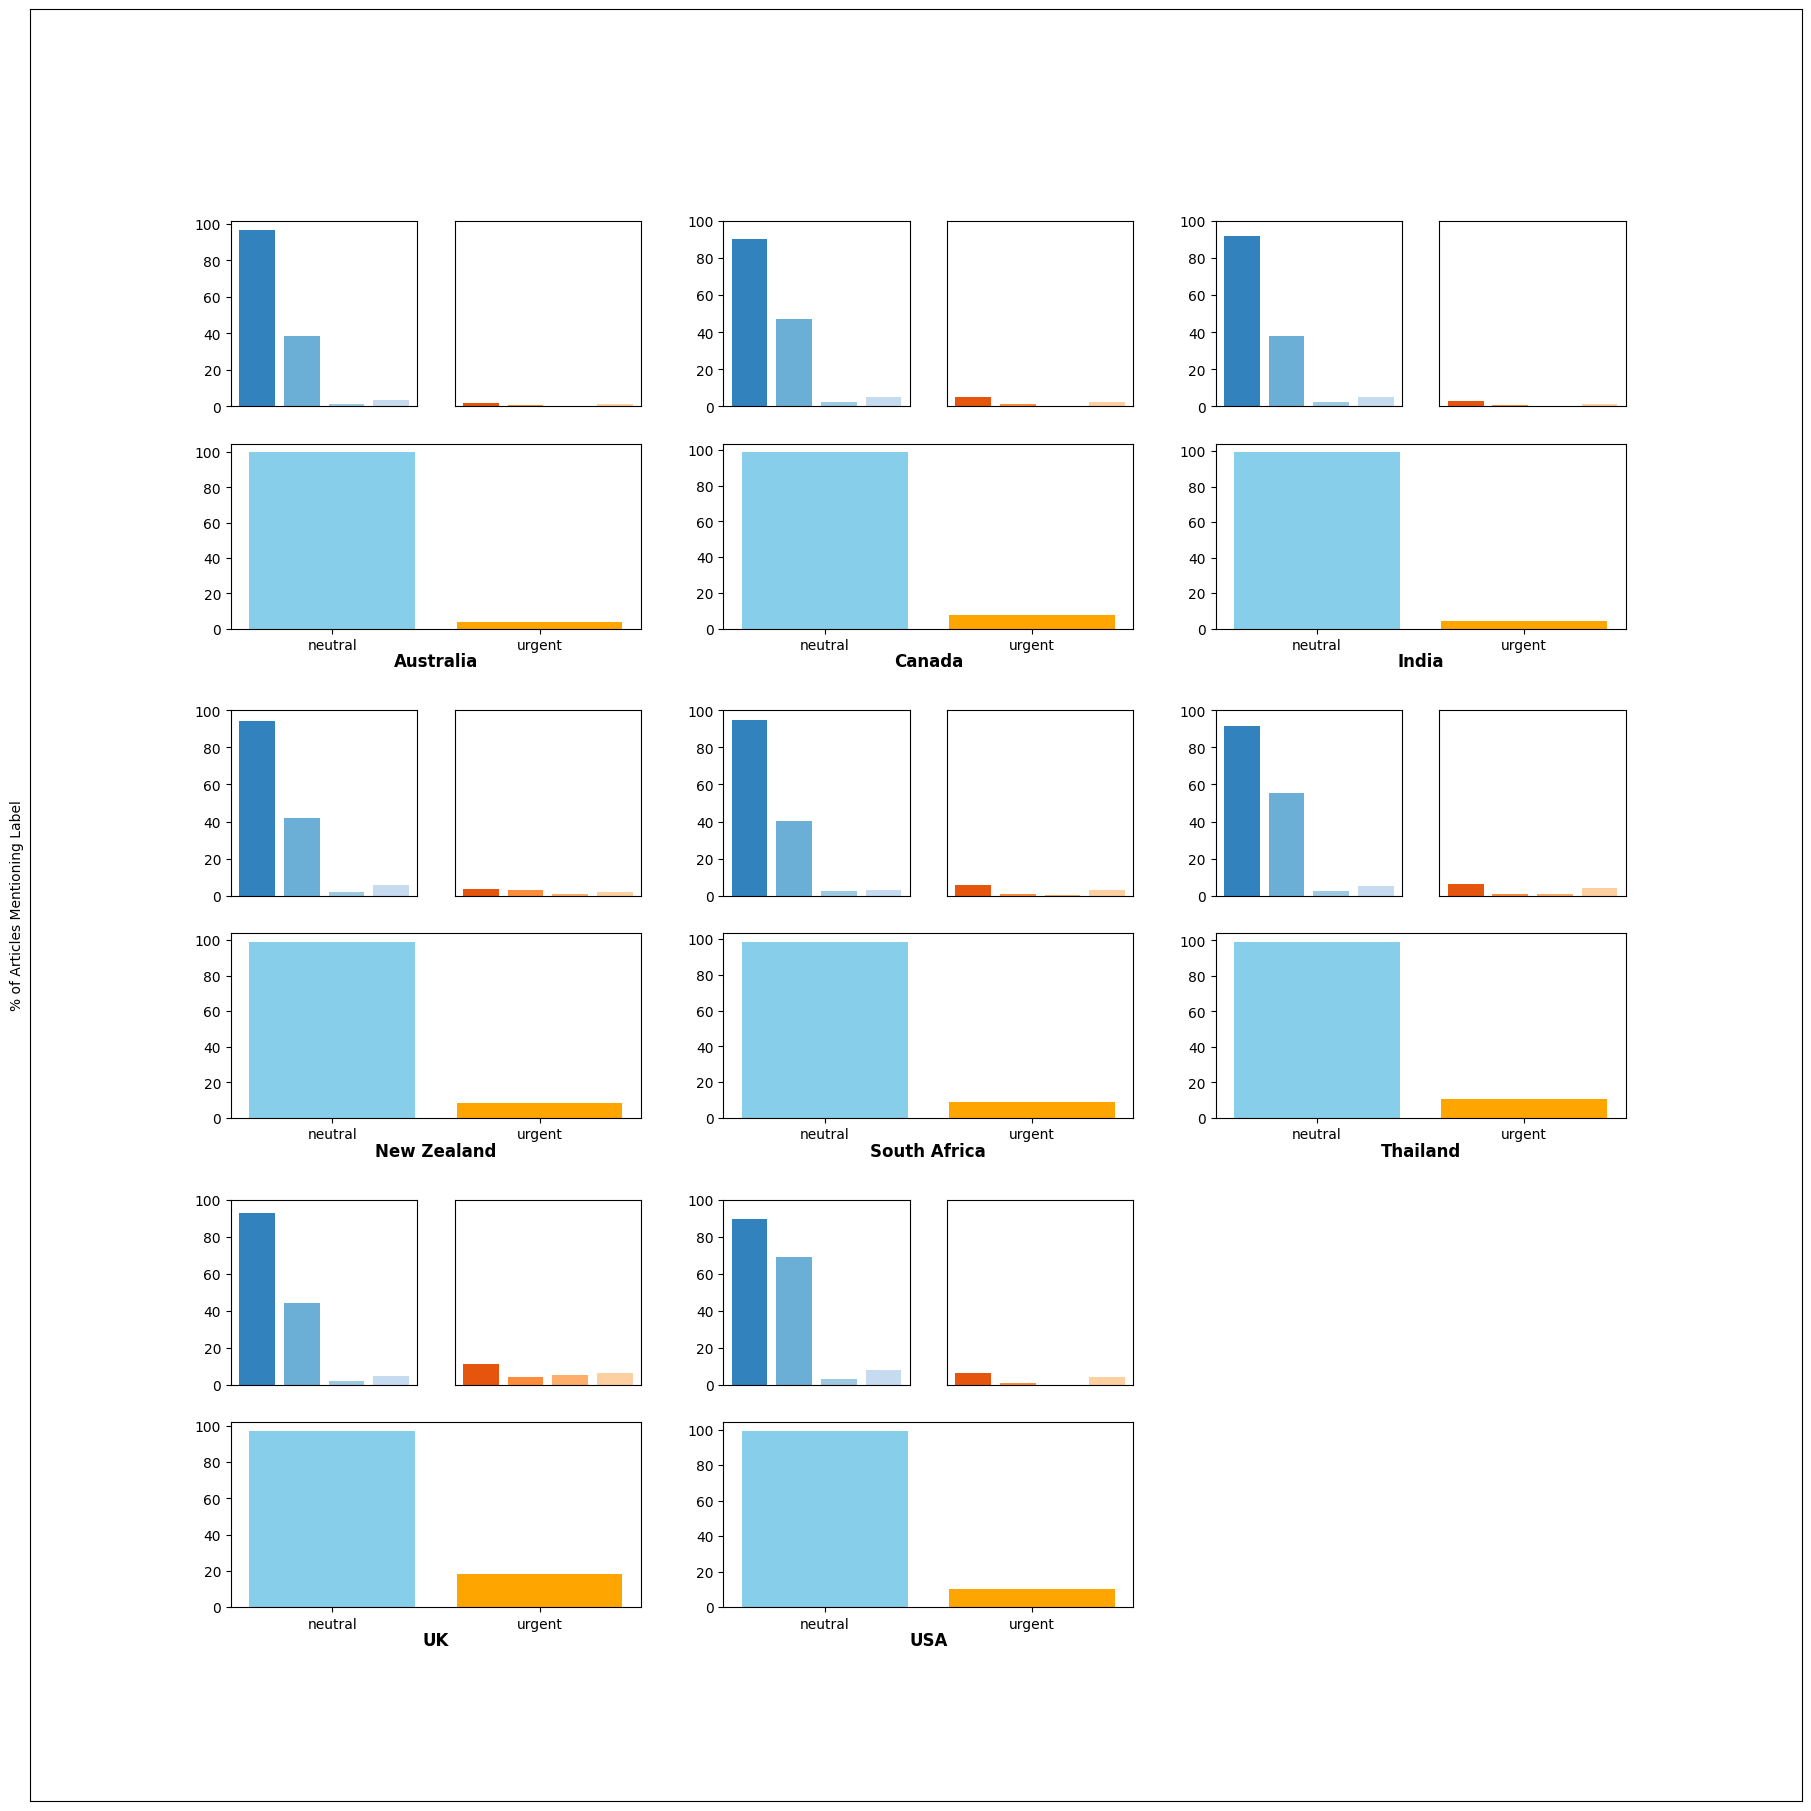

In [38]:
fig = plt.figure(layout='constrained', figsize=(18, 18))
plt.ylabel('% of Articles Mentioning Label')
plt.xticks([])
plt.yticks([])
gs = GridSpec(3, 3)

plotcountry(gs[0, 0],"Australia")
plotcountry(gs[0, 1],"Canada")
plotcountry(gs[0, 2],"India")
plotcountry(gs[1, 0],"New Zealand")
plotcountry(gs[1, 1],"South Africa")
plotcountry(gs[1, 2],"Thailand")
plotcountry(gs[2, 0],"UK")
plotcountry(gs[2, 1],"USA")

#gs.update(wspace=0.2, hspace = 0.2)
#plt.legend()
#plt.tight_layout(pad=10)
plt.show()

In [34]:
Thai = df[["climate change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "climatic change_binary", "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "Thailand"]
Thai["global warming_binary"].value_counts(normalize=True)

global warming_binary
1    0.55259
0    0.44741
Name: proportion, dtype: float64

In [35]:
USA = df[["climate change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "climatic change_binary", "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "USA"]
USA["global warming_binary"].value_counts(normalize=True)

global warming_binary
1    0.688468
0    0.311532
Name: proportion, dtype: float64

In [44]:
UK = df[["climate change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "climatic change_binary", "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "UK"]
UK["climate crisis_binary"].value_counts(normalize=True)

climate crisis_binary
0    0.886535
1    0.113465
Name: proportion, dtype: float64

#### RQ3.2

In [39]:
media = df[["climate change", "global warming", "greenhouse effect", "climate warming", "climatic change", 
            "greenhouse warming", "warming climate", "changing climate", "warmer climate", "planetary warming",
            "climatic disruption", "climate catastrophe", "climate chaos", "climate crisis", "climate disaster", 
            "climate emergency", "global heating", "climate breakdown", "climate threat", "outlet",
            "label_sum"]].groupby(["outlet"]).sum()
media["other neutral"] = media[["climate warming","climatic change", "greenhouse effect", "warmer climate", 
                                "planetary warming", "greenhouse warming", "warming climate"]].sum(axis=1)
media["other urgent"] = media[["climatic disruption","climate catastrophe", 
                                   "climate chaos","climate disaster","climate breakdown", 
                                   "climate threat"]].sum(axis=1)
media2 = media[["climate change", "global warming", "changing climate", "other neutral", "climate crisis",
               "climate emergency", "global heating", "other urgent"]]
media2 = (media2.div(media.label_sum, axis=0))*100
#media.reset_index(inplace=True)

In [40]:
media2

,climate change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
outlet,,,,,,,,
Bangkok Post,71.089603,23.665314,0.530752,1.108336,2.076179,0.234155,0.202935,1.092726
GlobeMail,71.286767,25.139752,0.600805,1.295648,0.909043,0.250771,0.057468,0.459746
Guardian,71.719204,16.605617,0.402414,0.992278,4.954513,1.191766,2.116975,2.017232
Hindu,77.497078,19.255747,0.558514,1.396285,0.753345,0.168853,0.038966,0.331212
Sunday Times,81.030780,11.811024,0.572656,1.360057,3.507516,0.644238,0.071582,1.002147
The Australian,81.279856,16.727834,0.311663,0.923337,0.300012,0.163113,0.020389,0.273797
The Nation,72.455506,23.470523,0.500556,1.237486,1.320912,0.055617,0.166852,0.792547
The New York Times,63.399873,31.657464,0.650350,1.613931,1.491824,0.265449,0.015927,0.905182
The New Zealand Herald,76.170634,19.189208,0.508510,1.553782,1.059397,1.002896,0.084752,0.430821


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

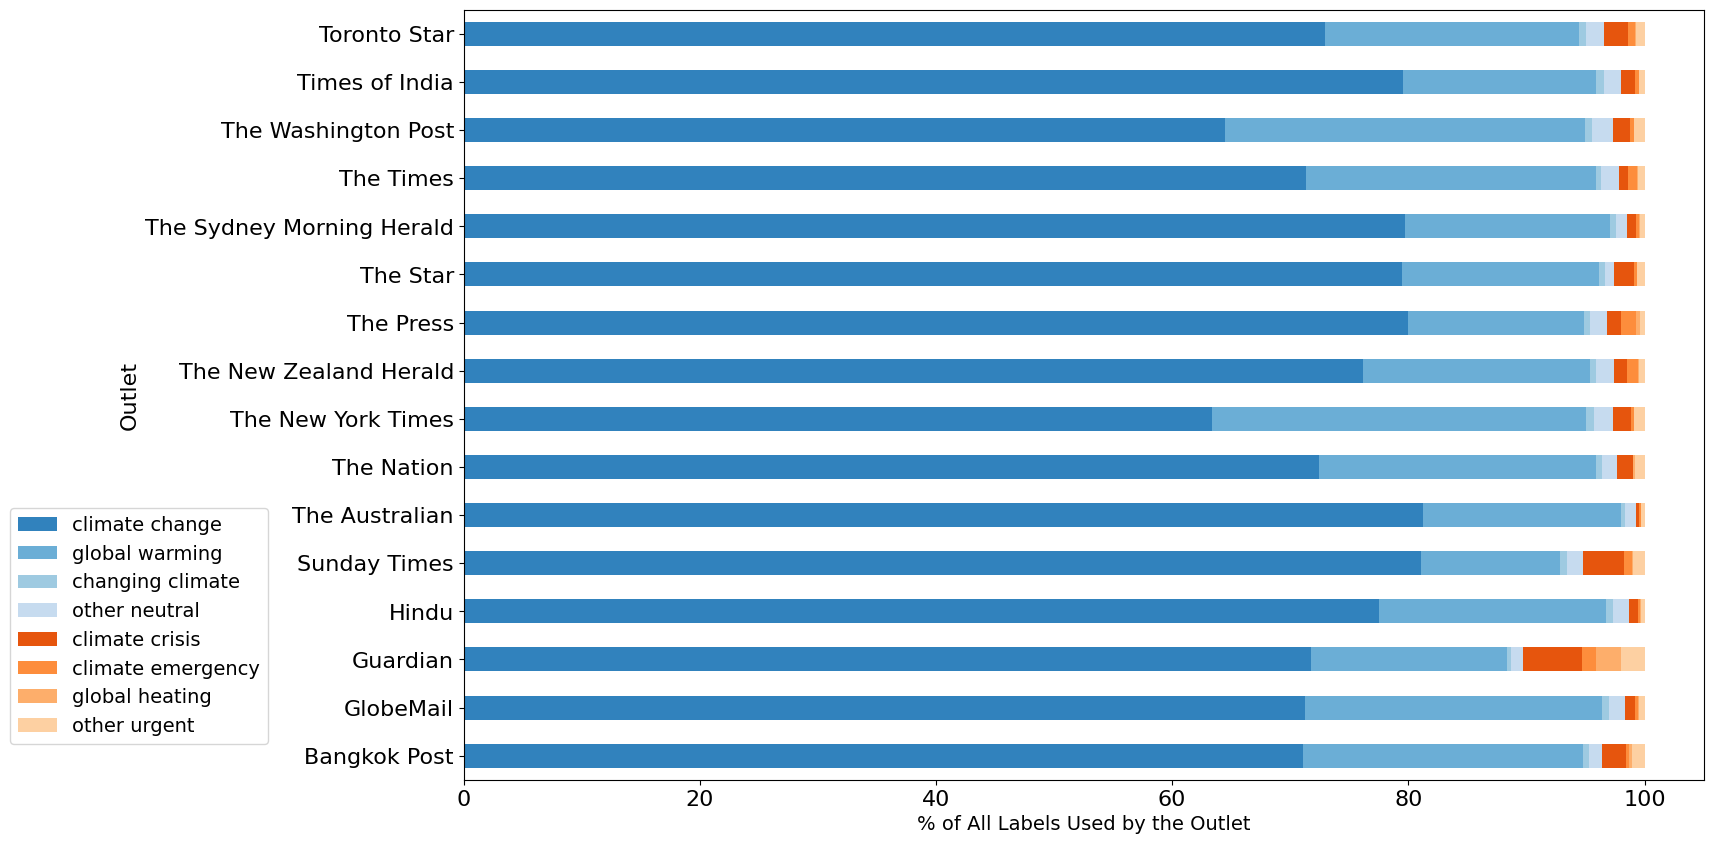

In [41]:
cmap = plt.get_cmap('tab20c')
#plt.figure(figsize=(16, 8))
media2.plot.barh(stacked=True, color=[cmap(i) for i in range(8)],figsize=(16, 10), )

plt.legend(loc='center right', bbox_to_anchor=(-0.15, 0.2), fontsize = 14)
plt.xlabel("% of All Labels Used by the Outlet", fontsize = 14, y=-0.35)
plt.ylabel("Outlet", fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

In [40]:
print(media2[["climate crisis","climate emergency", "global heating", "other urgent"]].sum(axis=1))

outlet
Bangkok Post                  3.630363
GlobeMail                     1.690898
Guardian                     10.330229
Hindu                         1.300654
Sunday Times                  5.270758
The Australian                0.760301
The Nation                    2.353271
The New York Times            2.703572
The New Zealand Herald        2.596386
The Press                     3.231991
The Star                      2.622757
The Sydney Morning Herald     1.497930
The Times                     2.168350
The Washington Post           2.652373
Times of India                1.965798
Toronto Star                  3.476967
dtype: float64
